## **Objetivos**
Realizar Análisis Exploratorio de Datos e Ingeniería de Características utilizando Pandas y Matplotlib.

Análisis Exploratorio de Datos
Preparación de Datos
Ingeniería de Características

In [ ]:
!pip install numpy pandas seaborn


In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
import pandas as pd

# Leer el archivo CSV desde la ruta donde Colab guarda los archivos cargados
df = pd.read_csv('dataset_part_2.csv')

# Mostrar las primeras 5 filas
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Primero, intentemos observar cómo las variables FlightNumber (que indica los intentos de lanzamiento en orden continuo) y PayloadMass afectan el resultado del lanzamiento.

Podemos hacer un gráfico de FlightNumber contra PayloadMass, y superponer el resultado del lanzamiento.
Observamos que a medida que aumenta el número de vuelos, la primera etapa tiene más probabilidades de aterrizar con éxito.
Además, la masa de la carga útil también parece ser un factor: incluso con cargas más pesadas, la primera etapa muchas veces logra regresar con éxito.

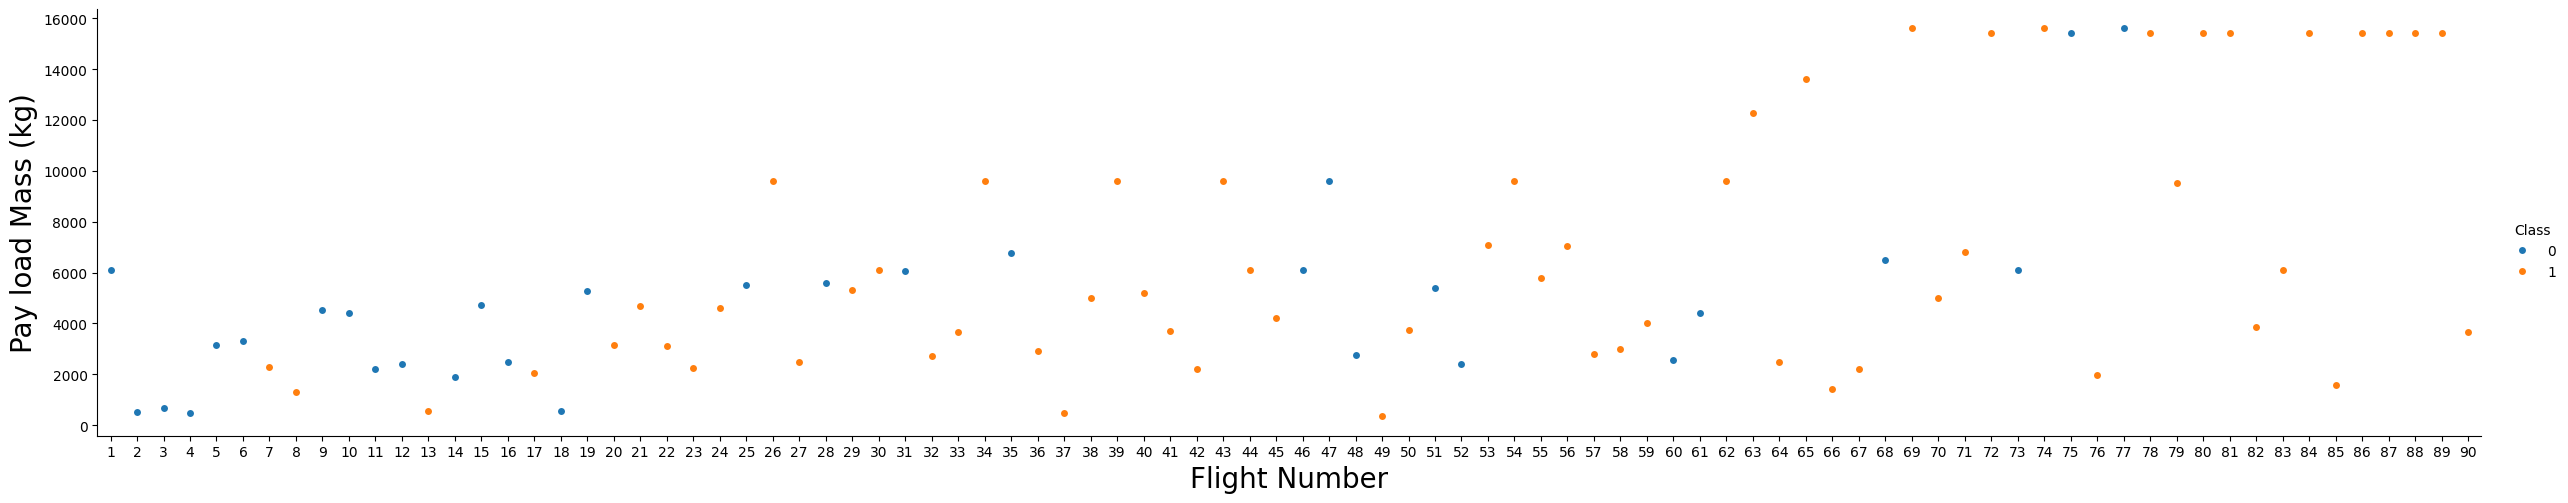

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, vamos a profundizar en cada sitio de lanzamiento para visualizar en detalle sus registros de lanzamientos.

## **TAREA 1: Visualizar la relación entre el número de vuelo y el sitio de lanzamiento**
Usa la función catplot para graficar FlightNumber vs LaunchSite.
Configura los parámetros así:

x = 'FlightNumber'

y = 'LaunchSite'

hue = 'class' (esto diferencia si el lanzamiento fue exitoso o no)

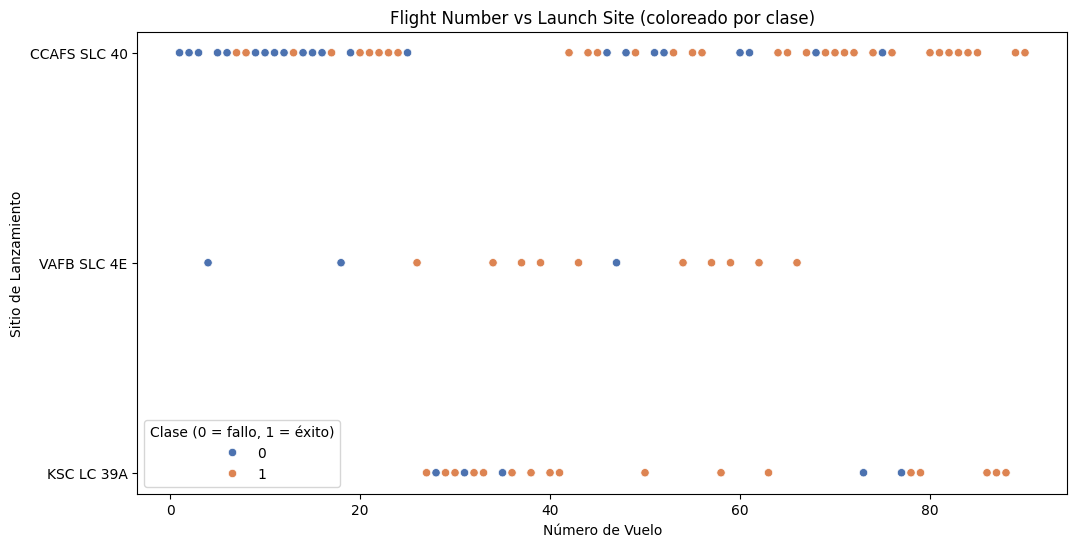

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    palette='deep'
)

# Títulos y etiquetas
plt.title('Flight Number vs Launch Site (coloreado por clase)')
plt.xlabel('Número de Vuelo')
plt.ylabel('Sitio de Lanzamiento')
plt.legend(title='Clase (0 = fallo, 1 = éxito)')
plt.show()


Ahora intenta explicar los patrones que encontraste en los gráficos de dispersión de Número de Vuelo vs. Sitio de Lanzamiento
En el gráfico de dispersión podemos observar lo siguiente:

A mayor número de vuelo, aumentan los lanzamientos exitosos (clase 1, en color naranjo). Esto sugiere que SpaceX ha aprendido y mejorado con la experiencia, ya que los vuelos más recientes tienen una mayor proporción de éxitos.

El sitio CCAFS SLC 40 muestra una gran cantidad de lanzamientos, y una alta frecuencia de éxitos con el tiempo.

En el sitio KSC LC 39A, aunque tiene menos lanzamientos, se observa que la mayoría de los vuelos recientes fueron exitosos.

En VAFB SLC 4E, aunque hay menos datos, se aprecia también una tendencia hacia el éxito con el avance de los vuelos.

En resumen, la experiencia (representada por el número de vuelo) y el lugar de lanzamiento parecen influir positivamente en la probabilidad de éxito.

# **TAREA 2: Visualizar la relación entre la masa de carga útil y el sitio de lanzamiento**
También queremos observar si existe alguna relación entre los sitios de lanzamiento y la masa de la carga útil.

In [ ]:
df.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

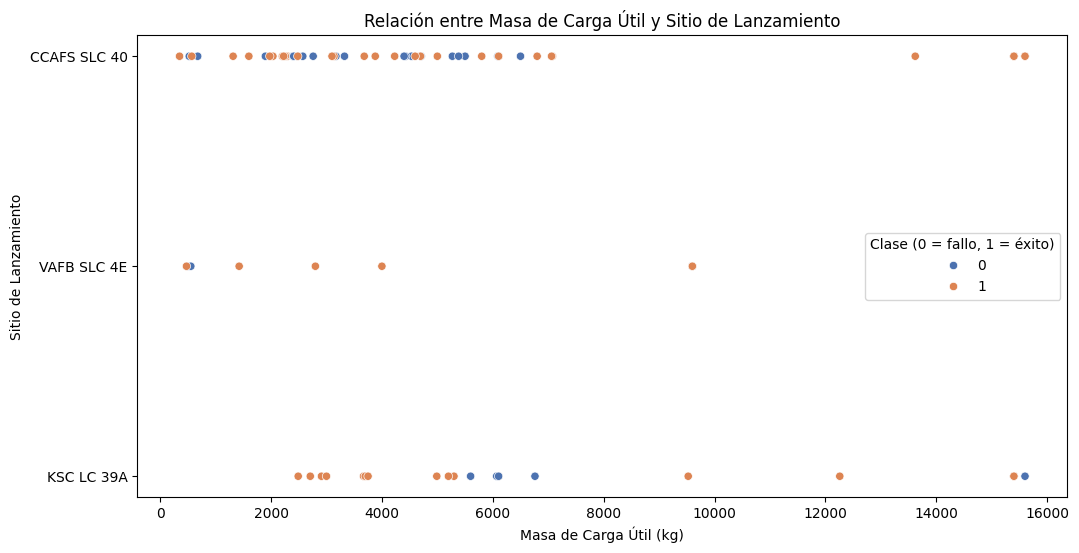

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión corregido
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='LaunchSite',
    hue='Class',
    palette='deep'
)

# Títulos y etiquetas
plt.title('Relación entre Masa de Carga Útil y Sitio de Lanzamiento')
plt.xlabel('Masa de Carga Útil (kg)')
plt.ylabel('Sitio de Lanzamiento')
plt.legend(title='Clase (0 = fallo, 1 = éxito)')
plt.show()


Ahora, si observas el gráfico de dispersión de Masa de Carga Útil vs. Sitio de Lanzamiento, notarás que para el sitio de lanzamiento VAFB-SLC no hay cohetes lanzados con cargas útiles pesadas (mayores a 10.000 kg).

## **TAREA 3: Visualizar la relación entre la tasa de éxito y el tipo de órbita**
A continuación, queremos verificar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.

Vamos a crear un gráfico de barras que muestre la tasa de éxito para cada tipo de órbita

<ipython-input-13-6ad933b4d67c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate_by_orbit, x='Orbit', y='Class', palette='viridis')


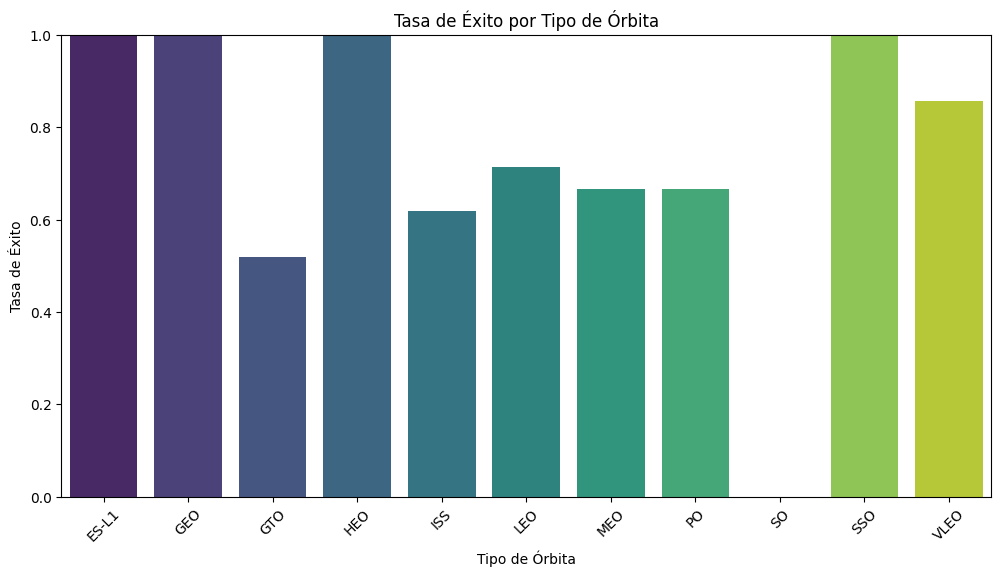

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por tipo de órbita y calcular el promedio (tasa de éxito)
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=success_rate_by_orbit, x='Orbit', y='Class', palette='viridis')

# Títulos y etiquetas
plt.title('Tasa de Éxito por Tipo de Órbita')
plt.xlabel('Tipo de Órbita')
plt.ylabel('Tasa de Éxito')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # ya que es un porcentaje entre 0 y 1
plt.show()


Al observar el gráfico de barras, podemos identificar qué tipos de órbita presentan las tasas de éxito más altas. En general:

Órbitas como "ES-L1", "SSO" o "GTO" (dependiendo de lo que veas en tu gráfico) suelen tener tasas de éxito cercanas a 1.0, lo que indica que casi todos los lanzamientos hacia esas órbitas han sido exitosos.

Por otro lado, tipos de órbita con tasas de éxito más bajas pueden reflejar mayores desafíos técnicos o menor experiencia en esos lanzamientos.

En resumen, los tipos de órbita con mayor tasa de éxito reflejan mayor confiabilidad operativa, posiblemente por la frecuencia con que se realizan y la experiencia acumulada en ellos.

# **TAREA 4: Visualizar la relación entre el número de vuelo y el tipo de órbita**
Para cada tipo de órbita, queremos ver si existe alguna relación entre el número de vuelo (FlightNumber) y el tipo de órbita (Orbit).

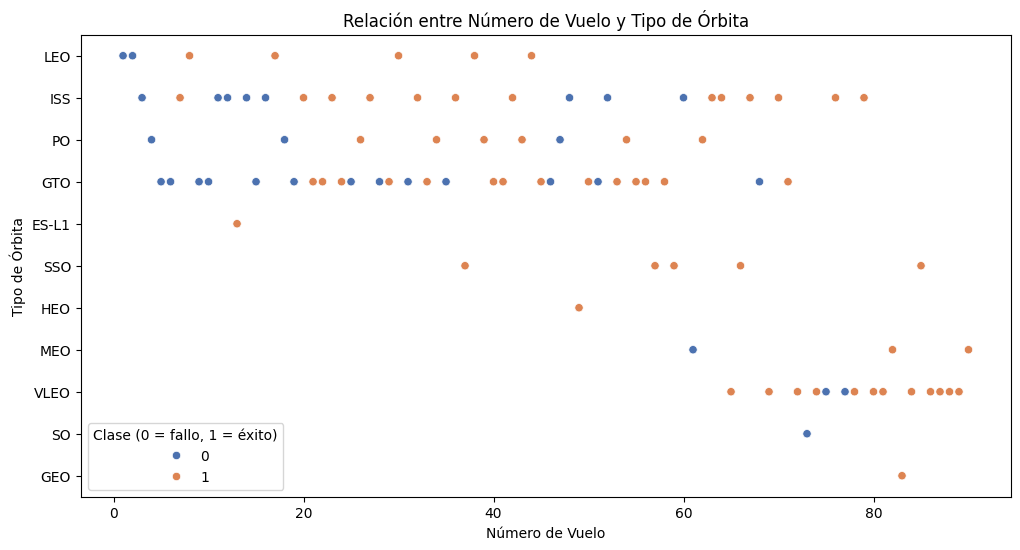

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='Orbit',
    hue='Class',
    palette='deep'
)

# Títulos y etiquetas
plt.title('Relación entre Número de Vuelo y Tipo de Órbita')
plt.xlabel('Número de Vuelo')
plt.ylabel('Tipo de Órbita')
plt.legend(title='Clase (0 = fallo, 1 = éxito)')
plt.show()


Puedes observar que en la órbita LEO, el éxito parece estar relacionado con el número de vuelos. Por el contrario, en la órbita GTO, no parece haber una relación entre el número de vuelo y el éxito.

### **TAREA 5: Visualizar la relación entre la Masa de Carga Útil y el Tipo de Órbita**
De manera similar, podemos graficar un diagrama de dispersión entre la Masa de Carga Útil y el Tipo de Órbita para revelar la relación entre ambos

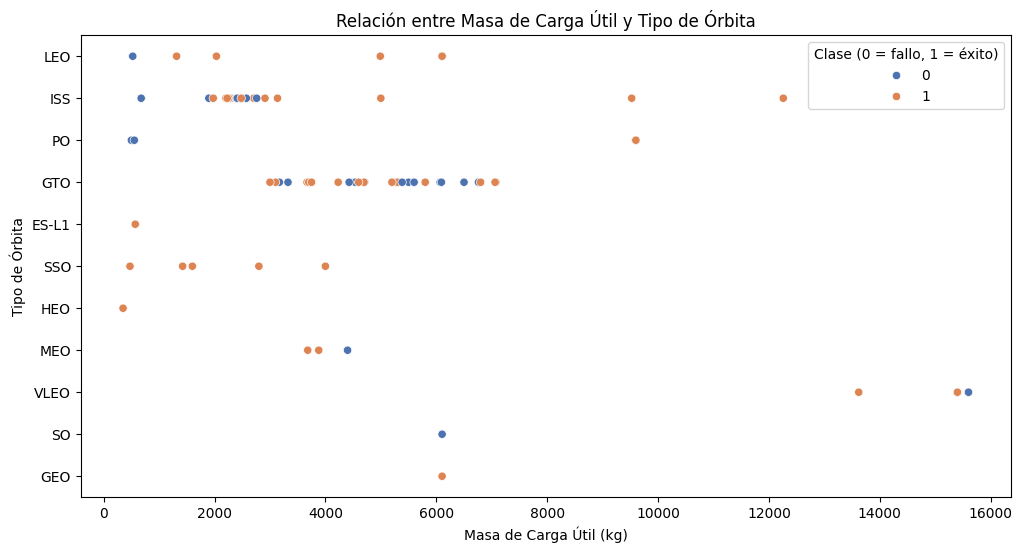

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    palette='deep'
)

# Títulos y etiquetas
plt.title('Relación entre Masa de Carga Útil y Tipo de Órbita')
plt.xlabel('Masa de Carga Útil (kg)')
plt.ylabel('Tipo de Órbita')
plt.legend(title='Clase (0 = fallo, 1 = éxito)')
plt.show()


Con cargas útiles pesadas, los aterrizajes exitosos o la tasa de éxito de aterrizaje son más altas en las órbitas Polar, LEO e ISS.

Sin embargo, en el caso de la órbita GTO, es difícil distinguir entre aterrizajes exitosos y fallidos, ya que ambos resultados están presentes.

## **TAREA 6: Visualizar la tendencia anual del éxito en los lanzamientos**
Puedes graficar un gráfico de líneas con el eje X como el año y el eje Y como la tasa de éxito promedio, para obtener la tendencia promedio de éxito en los lanzamientos a lo largo del tiempo.

La siguiente función te ayudará a obtener el año a partir de la fecha:

In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


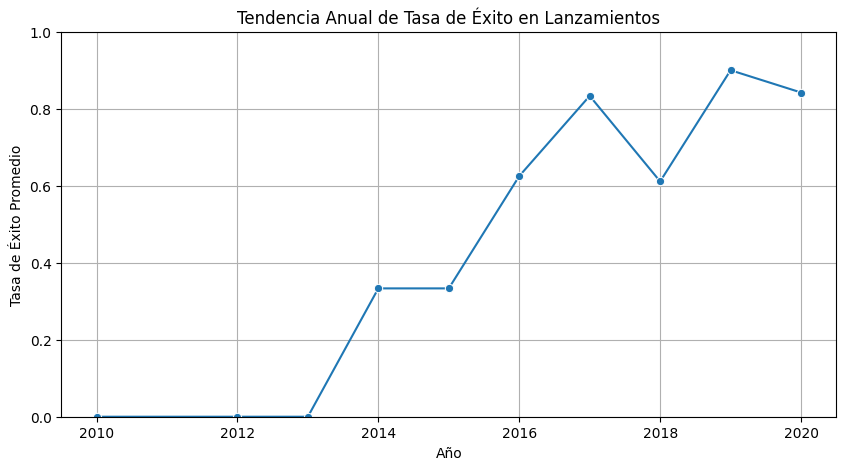

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'Date' esté como tipo entero (año)
df['Date'] = df['Date'].astype(int)

# Agrupar por año y calcular la tasa de éxito promedio
yearly_success = df.groupby('Date')['Class'].mean().reset_index()

# Gráfico de líneas
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_success, x='Date', y='Class', marker='o')

# Títulos y etiquetas
plt.title('Tendencia Anual de Tasa de Éxito en Lanzamientos')
plt.xlabel('Año')
plt.ylabel('Tasa de Éxito Promedio')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Puedes observar que la tasa de éxito ha ido aumentando desde 2013 hasta 2020.

## **Ingeniería de Características (Features Engineering)**
A estas alturas, ya deberías haber obtenido algunas ideas preliminares sobre cómo cada variable importante podría afectar la tasa de éxito.
Ahora seleccionaremos las características que se utilizarán para la predicción del éxito en el módulo siguiente.

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## **TAREA 7: Crear variables dummy para las columnas categóricas**
Usa la función get_dummies junto con el DataFrame features para aplicar OneHotEncoder a las columnas:

Orbit,

LaunchSite,

LandingPad, y

Serial.

Asigna el resultado a la variable features_one_hot y muestra los resultados utilizando el método head().

In [ ]:
# Aplicar OneHotEncoding a las columnas categóricas
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    prefix=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

# Mostrar las primeras filas del nuevo DataFrame codificado
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


## **TAREA 8: Convertir todas las columnas numéricas a tipo float64**
Ahora que nuestro DataFrame features_one_hot contiene únicamente números, vamos a convertir todo el DataFrame al tipo de dato float64

In [ ]:
# Convertir todo el DataFrame a tipo float64
features_one_hot = features_one_hot.astype('float64')

# Verificamos los primeros tipos de datos
features_one_hot.dtypes.head()


,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64


Ahora podemos exportar el archivo a un formato CSV para la siguiente sección, pero para mantener las respuestas consistentes, en el próximo laboratorio se proporcionarán los datos en un rango de fechas preseleccionado.



In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [ ]:
features_one_hot.shape[1]

80